# Análise exploratória dos dados [NextGen energy storage](https://zenodo.org/records/14885589)

Um conjunto de dados sobre consumo de eletricidade residencial, geração solar em telhados e operações de bateria referente a 100 residências no Território da Capital Australiana (ACT), Austrália.

Os dados foram coletados e disponibilizados para uso pelo Governo do ACT através do programa *The Next Generation (Nextgen) Energy Storage*.

Os dados estão descritos neste artigo de conferência: [https://doi.org/10.1145/3307772.3331017](https://doi.org/10.1145/3307772.3331017) - *preprint* disponível em: [https://zenodo.org/records/14885676](https://zenodo.org/records/14885676)

**As colunas de dados são:**

* `index`: índice
* `load power (kW)`: potência da carga (consumo)
* `solar power (kW)`: potência solar
* `battery power (kW)`: potência da bateria
* `battery SoC (kWh)`: Estado de Carga (*State of Charge*) da bateria
* `solar capacity (kW)`: capacidade solar instalada
* `battery capacity (kWh)`: capacidade de energia da bateria
* `battery peak power (kW)`: potência de pico da bateria

**Referência:**
[1] B. Sturmberg e M. Shaw, “Select data from the NextGen energy storage trial in the ACT, Australia”. Zenodo, 11 de jun. de 2025. doi: [10.5281/zenodo.14885589.](https://doi.org/10.5281/zenodo.14885589)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('../data/14885589/0-id_114.csv')
df1 = pd.read_csv('../data/14885589/90-id_261.csv')
df1 = pd.read_csv('../data/14885589/14-id_292.csv')
df1['original index'] = pd.to_datetime(df1['original index'], unit='s')
print(df1.shape)
df1.head()

(105120, 8)


,original index,load power (kW),solar power (kW),battery power (kW),battery SoC (kWh),solar capacity (kW),battery capacity (kWh),battery peak power (kW)
0,2017-12-31 13:00:00,0.446906,0.0,-0.447306,2.698278,5.0574,6.52,3.0
1,2017-12-31 13:05:00,0.473706,0.0,-0.469306,2.666158,5.0574,6.52,3.0
2,2017-12-31 13:10:00,0.537384,0.0,-0.538184,2.608000,5.0574,6.52,3.0
3,2017-12-31 13:15:00,0.531045,0.0,-0.532245,2.552421,5.0574,6.52,3.0
4,2017-12-31 13:20:00,0.506502,0.0,-0.507102,2.504368,5.0574,6.52,3.0


In [4]:
df1['original index'].min(), df1['original index'].max(), df1['original index'].max() - df1['original index'].min() 

(Timestamp('2017-12-31 13:00:00'),
 Timestamp('2018-12-31 12:55:00'),
 Timedelta('364 days 23:55:00'))

In [5]:
df1.columns

Index(['original index', 'load power (kW)', 'solar power (kW)',
       'battery power (kW)', 'battery SoC (kWh)', 'solar capacity (kW)',
       'battery capacity (kWh)', 'battery peak power (kW)'],
      dtype='object')

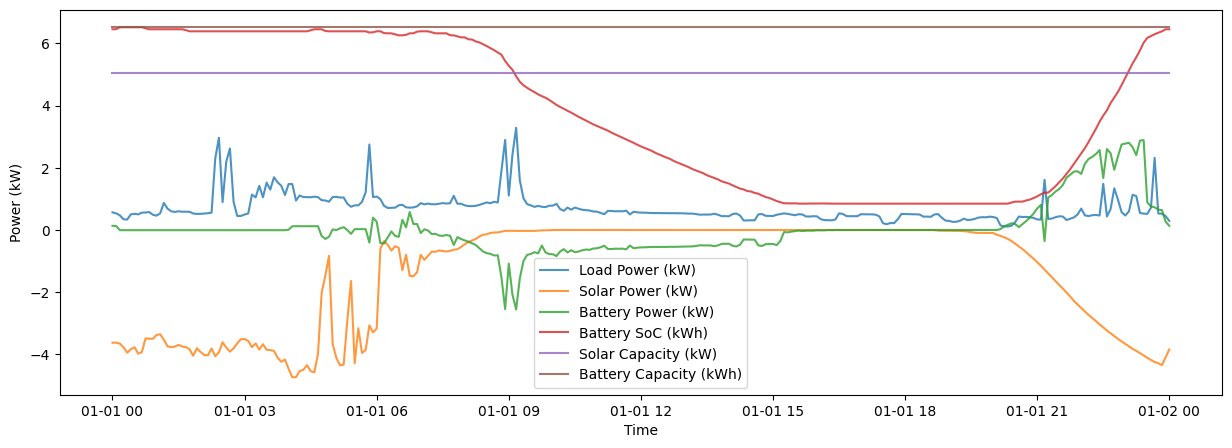

In [6]:
# Definir intervalo
start = "2018-01-01"
end   = "2018-01-02"

# Selecionar apenas esse período
df_window = df1[(df1['original index'] >= start) & (df1['original index'] <= end)]

# Plotar
fig, axe = plt.subplots(figsize=(15, 5))
axe.plot(df_window['original index'], df_window['load power (kW)'], alpha=0.8, label='Load Power (kW)')
axe.plot(df_window['original index'], df_window['solar power (kW)'], alpha=0.8, label='Solar Power (kW)')
axe.plot(df_window['original index'], df_window['battery power (kW)'], alpha=0.8, label='Battery Power (kW)')
axe.plot(df_window['original index'], df_window['battery SoC (kWh)'], alpha=0.8, label='Battery SoC (kWh)')
axe.plot(df_window['original index'], df_window['solar capacity (kW)'], alpha=0.8, label='Solar Capacity (kW)')
axe.plot(df_window['original index'], df_window['battery capacity (kWh)'], alpha=0.8, label='Battery Capacity (kWh)')
axe.legend()
axe.set_xlabel('Time')
axe.set_ylabel('Power (kW)')
plt.show()
